# ISYE 6740 - Machine Learning
## Homework 5 - Graham Billey

### 1. SVM.

**a) Explain why we can set `c=1` to derive the SVM formulation?**

To find the SVM classifier, we want to maximize the margin $\gamma = \frac{2c}{||\vec w||}$. Since $\vec w$ is the normal vector to the decision boundary, we really only care about the direction $\vec w$ is pointing. We aren't concerned with the length of $\vec w$. 

Since $c$ only affects the length of $\vec w$ and not the direction, we can drop it as a constant to make the future derivation easier.

**b) Using Lagrangian dual formulation, show that the weight vector can be represented as:**

$$ \vec w = \sum_{i=1}^{n} \alpha_i y_y x_i $$

**where $\alpha_i \geq 0$ are the dual variables. What does this imply in terms of how to relate data to $\vec w$?**

The dual problem can be written as:

$$ L(\vec w, \vec \alpha, b) = \frac{1}{2} \vec w^T \vec w + \sum_{i} \alpha_i (1 - y_i (\vec w^T x_i + b))$$

We know that maximizing the dual problem is equivalent to minimizing the primal problem. We can maximize $L$ by taking the derivatives w.r.t. $\vec w$ and $b$ and setting it equal to $0$.

$$ \frac{\partial L}{\partial \vec w} = \vec w - \sum_{i} \alpha_i y_i x_i = 0 $$

Thus,

$$ \vec w = \sum_{i=1}^{n} \alpha_i y_i x_i  $$

This shows that $\vec w$ is a linear combination of the data itself. 

**c) Explain why only the data points on the "margin" will contribute to the sum above, i.e. playing a role in defining $\vec w$.**

Back to the Lagrangian formulation of the original problem:

$$ L(\vec w, \vec \alpha, b) = \frac{1}{2} \vec w^T \vec w + \sum_{i} \alpha_i g_i(\vec w) $$

$$ \quad\quad\quad\quad\quad\quad\quad\quad\quad = \frac{1}{2} \vec w^T \vec w + \sum_{i} \alpha_i (1 - y_i (\vec w^T x_i + b))$$

One of the KKT conditions states that at the optimal solution, each $ \alpha_i g_i(\vec w) = 0$. Therefore either $\alpha_i = 0$ or $g_i(\vec w) = 0$.

From what we showed above, for a point on the margin each $\alpha_i > 0$. Therefore $g_i(\vec w) = 0$. 

Therefore the points on the margin do contribute to $\vec w$.

**For points not on the margin $\alpha_i = 0$ and $g_i(\vec w) < 0$. Since $\vec w$ is formed from a linear combination of the $a_i$'s and the datapoints, the datapoints not on the margin do not contribute to $\vec w$.**

### 2. Naive Bayes for Spam Filtering.

In this problem we will use the Naive Bayes algorithm to fit a spam filter by hand. 

Spam filters are used in all email services to classify received emails as "Spam" or "Not Spam". A simple approach involves maintaining a vocabulary of words that commonly occur in "Spam" emails and classifying an email as "Spam" if the number of words from the dictionary that are present in the email is over a certain threshold. We are given the following vocabulary consisting of 15 words:

`V` = {`secret`, `offer`, `low`, `price`, `valued`, `customer`, `today`, `dollar`, `million`, `sports`, `is`, `for`, `play`, `healthy`, `pizza`}

For our training dataset, we are given the following 3 spam messages:

- `million dollar offer`
- `secret offer today`
- `secret is secret`

and 4 example non-spam messages:

- `low price for valued customer`
- `play secret sports today`
- `sports is healthy`
- `low price pizza`

Recall that the Naive Bayes classifier assumes the probability of an input $\vec x = [x_1, x_2, ..., x_n]^T$ depends on its class $y$. In our case, the input vector $\vec x$ corresponding to each message has length $n = 15$, where each entre $x_i$ is equal to the number of times word $V_i$ occurs in $\vec x$.

**a) Calculate $P(y=0)$ and $P(y=1)$ from from the training data, where $y=0$ corresponds to spam messages, and $y=1$ corresponds to non-spam messages.**

$$ P(y=0) = 3/7 \approx 42.9 \% $$

$$ P(y=1) = 4/7 \approx 57.1 \%  $$

**b) List the feature vector $\vec x$ for each span and non-spam message.**

#### Spam messages:

- `million dollar offer` = $[0,1,0,0,0,0,0,1,1,0,0,0,0,0,0]^T$
- `secret offer today` = $[1,1,0,0,0,0,1,0,0,0,0,0,0,0,0]^T$
- `secret is secret` = $[2,0,0,0,0,0,0,0,0,0,1,0,0,0,0]^T$

#### Non-spam messages:

- `low price for valued customer` = $[0,0,1,1,1,1,0,0,0,0,0,1,0,0,0]^T$
- `play secret sports today` = $[1,0,0,0,0,0,1,0,0,1,0,0,1,0,0]^T$
- `sports is healthy` = $[0,0,0,0,0,0,0,0,0,1,1,0,0,1,0]^T$
- `low price pizza` = $[0,0,1,1,0,0,0,0,0,0,0,0,0,0,1]^T$


**c) In the Naive Bayes model, the likelihood of a sentence with feature vector $\vec x$ given class $c$ is:**

$$ P(\vec x|y=c) = \prod_{k=1}^{n} = \theta_{c,k}^{x_k} $$

where $\theta_{c,k} \in (0,1)$ is the weight of word $k$ in class $c$, which satisfies $\sum_{k=1}^{n} \theta_{c,k} = 1, \, \forall c$.

Calculate the maximum likelihood estimates of $\theta_{0,1}$, $\theta_{0,7}$, $\theta_{1,1}$, $\theta_{1,15}$ by maximizing $P(\vec x|y=c)$ with respect to $\theta_{c,k}$ and the given data.

For example: $\theta_{0,1}$ = $\frac{\# \,\, of \,\,'secret' \,\, in \,\, spam}{\# \,\, of \,\, words \,\, in \,\, spam}$

$\theta_{0,1} = \frac{3}{9} \approx 0.333$

$\theta_{0,7} = \frac{1}{9} \approx 0.111$

$\theta_{1,1} = \frac{1}{15} \approx 0.067$

$\theta_{1,15} = \frac{1}{15} \approx 0.067$

**d) Given a new message `today is secret`, decide whether it is spam or not spam based on the Naive bayes classifier learned from the above data.**

Bayes formula is:

$$ P(y|x) = \frac{P(x|y)P(y)}{P(x)} $$

Therefore:

$$ P(Spam|x) = \frac{P(x|Spam)P(Spam)}{P(x)} $$

and 

$$ P(Not Spam|x) = \frac{P(x|Not Spam)P(Not Spam)}{P(x)} $$

Since both $P(Spam|x)$ and $P(Not Spam|x)$ are both normalized by $P(x)$, we can classify the new message without explicitly calculating $P(x)$. Instead we just need to calculate $ P(x|Spam)P(Spam) $ and $ P(x|Not Spam)P(Not Spam) $ and compare the unnormalized pseudo-probabilities.

$\theta_{spam,today} = \theta_{0,7} = \frac{1}{9} \approx 0.111$

$\theta_{spam,is} = \theta_{0,11} = \frac{1}{9} \approx 0.111$

$\theta_{spam,secret} = \theta_{0,1} = \frac{3}{9} \approx 0.333$

$\theta_{not-spam,today} = \theta_{1,7} = \frac{1}{15} \approx 0.067$

$\theta_{not-spam,is} = \theta_{1,11} = \frac{1}{15} \approx 0.067$

$\theta_{not-spam,secret} = \theta_{1,1} = \frac{1}{15} \approx 0.067$

$ P(today-is-secret|Spam)P(Spam) = \frac{1}{9}*\frac{1}{9}*\frac{3}{9}*\frac{3}{7} = \frac{9}{5103} \approx 0.001764 $

$ P(today-is-secret|Not-Spam)P(Not-Spam) = \frac{1}{15}*\frac{1}{15}*\frac{1}{15}*\frac{4}{7} = \frac{4}{23625} \approx 0.000169 $

Since: $$P(today-is-secret|Spam)P(Spam) > P(today-is-secret|Not-Spam)P(Not-Spam)$$ 

We conclude that **the message is spam**.

### 3. Comparing Bayes, Logistic, and KNN Classifiers.

#### a) Part One (Divorce Classification/Prediction)

Build 3 classifiers using Naive Bayes, Logistic Regression, and KNN. Use the first 80% of the data for training and 20% for testing. 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.io import loadmat

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('q3.csv', header=None)
display(data.head())
print(data.describe())

data=data.values

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


               0           1           2           3           4           5   \
count  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000   
mean     1.770777    1.633135    1.798309    1.370588    1.342256    0.847017   
std      1.929021    1.740227    1.698275    1.821564    1.855237    1.348739   
min     -2.023485   -1.740792   -2.566943   -3.519291   -2.130629   -2.767585   
25%      0.074385    0.203852    0.692089   -0.081704   -0.092502   -0.214556   
50%      1.906986    1.571904    1.735973    1.265344    1.161074    0.706923   
75%      3.386862    2.896925    3.107852    2.745149    2.840452    1.760754   
max      7.131655    5.468516    6.252416    6.348411    6.386664    4.452201   

               6           7           8           9   ...          45  \
count  170.000000  170.000000  170.000000  170.000000  ...  170.000000   
mean     0.473006    1.433578    1.418732    1.463634  ...    2.500142   
std      1.307073    1.784217    1.948064    1.5

Here we can see that the predictors are all of similar magnitude, and appear to be normally distributed. If this were a real-world dataset, it would be best to look for covariance between predictors, and test if they are normally distributed. It might also be best to normalize the data. However for the sake of this homework, I'll be building models off of the unnormalized data, and assuming that each predictor is normally distributed.

In [4]:
X = data[:,:-1]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print('------------------------------------ Naive Bayes ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_gnb).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_gnb).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

# Logistic Regression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_logreg = lr.predict(X_test)
print('-------------------------------- Logistic Regression -------------------------------- ')
print(f'We accurately labeled {(y_test == y_pred_logreg).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_logreg).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

# KNN
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('-------------------------------- K-Nearest Neighbors -------------------------------- ')
print(f'We accurately labeled {(y_test == y_pred_knn).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_knn).sum()/y_test.shape[0] *100, 2)}%')
print('\n')


------------------------------------ Naive Bayes ------------------------------------ 
We accurately labeled 32 points out of 34 in the test set,for an accuracy of 94.12%


-------------------------------- Logistic Regression -------------------------------- 
We accurately labeled 31 points out of 34 in the test set,for an accuracy of 91.18%


-------------------------------- K-Nearest Neighbors -------------------------------- 
We accurately labeled 32 points out of 34 in the test set,for an accuracy of 94.12%




**i) Report testing accuracy for each of the three classifiers. Comment on their performance: which performs the best and make a guess why they perform best in this setting.**

All 3 classifiers performed very well. The Naive Bayes and KNN classifiers both accurately labeled 32/34 datapoints in the test set, while the Logistic Regression classifier was slightly less accurate at 31/34 correct labels. 

The Naive Bayes likely performed so well because we assume the data came from a Gaussian distribution, which is why we picked a Gaussian Naive Bayes approach. This method would have likely performed much worse if we attempted to fit a model using a different distribution. 

The KNN model also does not assume any distribution of the data, which may be one reason it performs so well. Also, by using `k=3`, I chose a rather small number of neighbors. This may be one reason that the model performed so well.

The Logistic Regression model assumes (among other things) that the log of the odds ratio can be modeled as a linear combination of the input variables. This might be one reason that the logistic regression model performed slightly worse than Naive Bayes and KNN. It might also be that the predictors are not entirely linearly independent (which is probably likely).



**ii) Use the first two features to train three new classifiers. Plot the data points and decision boundary of each classifier. Comment on the difierence between the decision boundary for the three classifiers. Please clearly represent the data points with different labels using different colors.**

------------------------------------ Naive Bayes ------------------------------------ 
We accurately labeled 29 points out of 34 in the test set,for an accuracy of 85.29%


-------------------------------- Logistic Regression -------------------------------- 
We accurately labeled 29 points out of 34 in the test set,for an accuracy of 85.29%


-------------------------------- K-Nearest Neighbors -------------------------------- 
We accurately labeled 28 points out of 34 in the test set,for an accuracy of 82.35%


The training data is shown below with a translucent circle, and the test data is shown below with an opaque "+"
Blue represents y=0 and red represents y=1


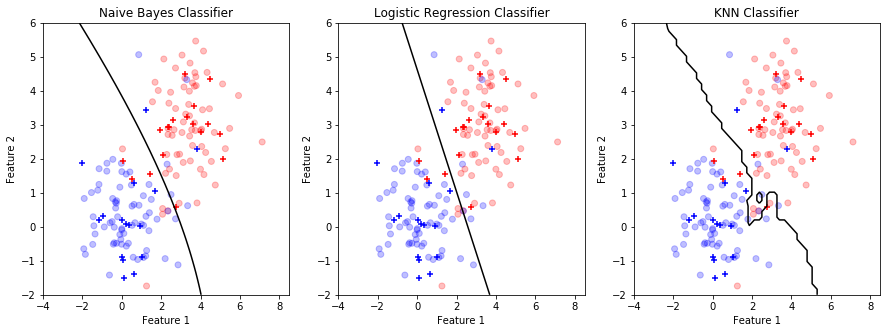

In [63]:
X = data[:,0:2]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

xx, yy = np.meshgrid(np.linspace(-4, 8.5, 50),
                     np.linspace(-2, 6, 50))

# Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
Z_nb = gnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])   # Calculate the decision boundary
Z_nb = Z_nb[:, 1].reshape(xx.shape)

print('------------------------------------ Naive Bayes ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_gnb).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_gnb).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

# Logistic Regression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_logreg = lr.predict(X_test)
Z_lr = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])   # Calculate the decision boundary
Z_lr = Z_lr[:, 1].reshape(xx.shape)

print('-------------------------------- Logistic Regression -------------------------------- ')
print(f'We accurately labeled {(y_test == y_pred_logreg).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_logreg).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

# KNN
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
Z_knn = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])   # Calculate the decision boundary
Z_knn = Z_knn[:, 1].reshape(xx.shape)
print('-------------------------------- K-Nearest Neighbors -------------------------------- ')
print(f'We accurately labeled {(y_test == y_pred_knn).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_knn).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

print('The training data is shown below with a translucent circle, and the test data is shown below with an opaque "+"')
print('Blue represents y=0 and red represents y=1')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

# Naive Bayes Plots
ax1.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='bwr', marker='o', alpha=0.25)
ax1.scatter(X_test[:,0], X_test[:,1],c=y_test, cmap='bwr', marker='+')
ax1.contour(xx, yy, Z_nb, [0.5], colors='k')
ax1.set_title('Naive Bayes Classifier')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Logistic Regression Plots Plots
ax2.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='bwr', marker='o', alpha=0.25)
ax2.scatter(X_test[:,0], X_test[:,1],c=y_test, cmap='bwr', marker='+')
ax2.contour(xx, yy, Z_lr, [0.5], colors='k')
ax2.set_title('Logistic Regression Classifier')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# KNN Plots Plots
ax3.scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='bwr', marker='o', alpha=0.25)
ax3.scatter(X_test[:,0], X_test[:,1],c=y_test, cmap='bwr', marker='+')
ax3.contour(xx, yy, Z_knn, [0.5], colors='k')
ax3.set_title('KNN Classifier')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

plt.show()


When the decision boundary is plotted, it is much easier to see the differences between how these classifiers work.

The **Naive Bayes** classifier has a very smooth decision boundary. This is expected since in this case the data is represented by two gaussian distributions, and the decision boundary is where the two distributions have equal probability. This makes sense geometrically, if you were to picture two smooth, oval shaped mountains, and the decisoin boundary is the valley between them.

The **logistic regression** decision boundary is a straight line. This makes sense when you consider the decision boundary represents where the probability is 0.5. Thus...

$$ \frac{1}{1 + e^{-\theta x}} = 0.5 $$ 

$$ 1 = e^{-\theta x} $$

$$ 0 = -\theta x  $$

This is a lienar function. In terms or classification accuracy, I could see this being problematic for datapoints that are near the decision boundary, but far away from the other datapoints. 

The **K-Nearest Neighbors** classifier has a decision boundary that is very jagged. This is because I used a small value for k (`k=3`). This can cause the classifier to overfit to the training data, which likely is happening here. However **I'm leaving it as is for the sake of the discussion**, although **in practice a larger value for k should be used**.

#### b) Part Two (Handwritten Digits Classification)

Repeat the above using the MNIST dataset. Here, give digit `6` label `y=1` and digit `2` label `y=0`.

Comment on their performance: which performs the best and make a guess why.

In [92]:
X = loadmat('data.mat')['data'].T
y = loadmat('label.mat')['trueLabel'].T
y = (y-2)/4     # Set all `2` digits to 0, and all `6` digits to 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])


# Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print('------------------------------------ Naive Bayes ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_gnb).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_gnb).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

# Logistic Regression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_logreg = lr.predict(X_test)
print('-------------------------------- Logistic Regression -------------------------------- ')
print(f'We accurately labeled {(y_test == y_pred_logreg).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_logreg).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

# KNN
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('-------------------------------- K-Nearest Neighbors -------------------------------- ')
print(f'We accurately labeled {(y_test == y_pred_knn).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_knn).sum()/y_test.shape[0] *100, 2)}%')
print('\n')


------------------------------------ Naive Bayes ------------------------------------ 
We accurately labeled 310 points out of 398 in the test set,for an accuracy of 77.89%


-------------------------------- Logistic Regression -------------------------------- 
We accurately labeled 390 points out of 398 in the test set,for an accuracy of 97.99%


-------------------------------- K-Nearest Neighbors -------------------------------- 
We accurately labeled 396 points out of 398 in the test set,for an accuracy of 99.5%




The **KNN classifier performed best** at 99.5% accuracy on the test set, followed by **logistic regression** with 97.99% accuracy on the test set, and **naive Bayes** with 77.89% accuracy on the test set. 

For this trial, I upped the number of neighbors to `k=10`, in order to help the model not overfit on the training data. This could be one reason the KNN classifier performed best. 

One reason that the naive Bayes mode l might perform worst is that the data does not come from a 784-variable Gaussian distribution. In fact, I'm surprised the Naive Bayes model was able to fit the data easily considering the numerical issues that arise when calculating the probability of any given point coming from a Gaussian with that many variables. 

I was surprised by how well the logistic regression performed, although the digits `2` and `6` are very different. I would like to know how well these three models perform at separating similar digits like `3` and `8`, or `1` and `7`. 

## Thank you for grading my homework!